In [1]:
import numpy as np
import pandas as pd
import scipy.special
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('digit-recognizer/train.csv')
test_data = pd.read_csv('digit-recognizer/test.csv')
sample_submission = pd.read_csv('digit-recognizer/sample_submission.csv')

# Data process

In [3]:
labels = train_data.iloc[:,0:1].values
train_data_without_labels = train_data.iloc[:,1:].values

In [4]:
#normalize data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_data_without_labels = sc.fit_transform(train_data_without_labels)

In [5]:
#hot encode classes
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
labels = ohe.fit_transform(labels).toarray()

In [6]:
from sklearn.model_selection import train_test_split

data_train, data_test, label_train, label_test = train_test_split(train_data_without_labels, labels, test_size = 0.3)

# Build network

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()
model.add(Dense(300, input_dim=784, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(data_train, label_train, validation_data = (data_test, label_test), epochs=9, batch_size=64)

Epoch 1/9
460/460 [==============================] - 2s 3ms/step - loss: 0.2832 - accuracy: 0.9169 - val_loss: 0.1853 - val_accuracy: 0.9553
Epoch 2/9
460/460 [==============================] - 1s 3ms/step - loss: 0.1057 - accuracy: 0.9681 - val_loss: 0.1409 - val_accuracy: 0.9633
Epoch 3/9
460/460 [==============================] - 1s 3ms/step - loss: 0.0588 - accuracy: 0.9812 - val_loss: 0.1673 - val_accuracy: 0.9625
Epoch 4/9
460/460 [==============================] - 1s 3ms/step - loss: 0.0396 - accuracy: 0.9882 - val_loss: 0.1439 - val_accuracy: 0.9654
Epoch 5/9
460/460 [==============================] - 1s 2ms/step - loss: 0.0289 - accuracy: 0.9906 - val_loss: 0.1710 - val_accuracy: 0.9629
Epoch 6/9
460/460 [==============================] - 1s 3ms/step - loss: 0.0372 - accuracy: 0.9883 - val_loss: 0.1708 - val_accuracy: 0.9655
Epoch 7/9
460/460 [==============================] - 1s 2ms/step - loss: 0.0316 - accuracy: 0.9904 - val_loss: 0.2030 - val_accuracy: 0.9609
Epoch 8/9
460

# Predictions

In [9]:
label_pred = model.predict(data_test)

pred = list()

for i in range(len(label_pred)):
    pred.append(np.argmax(label_pred[i]))

test = list()

for i in range(len(label_test)):
    test.append(np.argmax(label_test[i]))

In [10]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(pred, test)

print('Accuracy is {}\%'.format(acc*100))

Accuracy is 96.61111111111111\%


# Plot accuracy

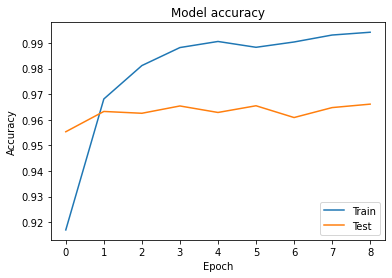

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

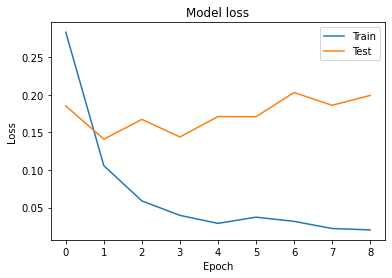

In [12]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

# Submit data

In [13]:
test_data_pred = model.predict(test_data)

pred = list()

for i in range(len(test_data_pred)):
    pred.append(np.argmax(test_data_pred[i]))

In [14]:
submission_data = []

for i in range(0, len(pred)):
    submission_data.append([i+1, pred[i]])

In [15]:
submit_net = pd.DataFrame(submission_data)
submit_net = submit_net.rename(columns={0: "ImageId", 1: "Label"})

In [16]:
submit_net.to_csv("submit_net_300_200.csv", index=False)